In [83]:
import pandas as pd
import numpy as np
import seaborn as sns

df=pd.read_csv('Data/E-commerce/user_sample_now.csv')

In [84]:
df['sign_in'].value_counts()

0    414957
1     40444
Name: sign_in, dtype: int64

In [92]:
df.describe()

TypeError: '<=' not supported between instances of 'int' and 'numpy.str_'

In [89]:
df.rename(columns={'saw_homepage': 'saw_purchasepage'},inplace=True)

In [90]:
df['saw_purchasepage'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 455401 entries, 0 to 455400
Series name: saw_purchasepage
Non-Null Count   Dtype
--------------   -----
455401 non-null  int64
dtypes: int64(1)
memory usage: 3.5 MB


### 구매와 관련된 요인 찾기 with 상관분석

In [100]:
import matplotlib.pylab as plt
correlation = df.corr()[['ordered']]
plt.figure(figsize=(16, 14))
sns.heatmap(correlation, vmax=0.6, center=0, square=True, linewidths=2, cmap='Blues')
# plt.savefig('heatmap.png')
plt.show()


TypeError: sort_values() missing 1 required positional argument: 'by'

In [99]:
df.corr()['ordered'].sort_values(ascending=False)

ordered                    1.000000
checked_delivery_detail    0.798720
saw_checkout               0.708986
sign_in                    0.665556
basket_icon_click          0.428334
basket_add_detail          0.414420
basket_add_list            0.287666
saw_purchasepage           0.157778
list_size_dropdown         0.154867
closed_minibasket_click    0.140011
image_picker               0.071492
returning_user             0.060295
checked_returns_detail     0.059484
account_page_click         0.057279
promo_banner_click         0.056533
sort_by                    0.054636
device_computer            0.049208
loc_uk                     0.031643
saw_delivery               0.031461
saw_account_upgrade        0.025857
detail_wishlist_add        0.023516
device_tablet              0.016939
saw_sizecharts             0.007548
device_mobile             -0.042907
Name: ordered, dtype: float64

**단순히 상관분석으로 연관관계를 설명할수있지만, 인과관계를 설명할순없기에 상세한 분석이 필요하다!!**

### 기초 EDA

- 0.주요 변수 설명  (yes or no 1 , 0 데이터로 이루어져있는 데이터)
> promo_banner_click: 구매관련 페이지로 링크된 프로모션 배너를 클릭 유무
> saw_purchasepage: 구매관련 페이지로 진입 유무
> ordered : 구매완료 유무
> basket_icon_click : 고객이 장바구니 아이콘을 클릭 유무
> basket_add_detail : 고객이 장바구니에 제품을 추가했는지 유무

- 1.페이지 접속경로
    - pc, moblie , tablet 을 사용하여 접속하는 유저는 각각의 column에 1로 표기됨
    - 각각의 column 데이터가 0,1로 3개의 column으로 표현되어있으므로 '페이지 접속카테고리' 의 하나의 컬럼으로 pc, moblie, tablet을 나누겟다.

- 원본데이터 형식


In [44]:
df.loc[:,['device_mobile','device_computer','device_tablet']]

,device_mobile,device_computer,device_tablet
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
455396,1,0,0
455397,1,0,0
455398,1,0,0
455399,1,0,0


- 유저들이 페이지에 접속하는 기기 유형 조사(비율)

In [52]:
device_list=['device_mobile','device_computer','device_tablet']
dx=df.loc[:,['device_mobile','device_computer','device_tablet']]

for list in device_list:
    
    print(f"{list}:",dx.query(f"{list} == 1").shape[0]/df.shape[0])

device_mobile: 0.6807055759649189
device_computer: 0.19422003904251417
device_tablet: 0.12836379366755893


결론:모바일로 들어오는 유저의 비율이 월등히 높다. 
각 기기별로 구매율은 어떻게 될까?  
전체 구매율을 높이고자하면, 구매율이 더 낮은 기기의 UI/UX를 개선해야한다고 생각한다.
단 태블릿의 UI는 모바일과 같다고 가정한다.

In [70]:
print(f"모바일화면(app)구매비율:",df.query("device_mobile==1 | device_tablet==1")['ordered'].value_counts(normalize=True))
print(f"pc화면 구매비율:",df.query("device_computer==1")['ordered'].value_counts(normalize=True))


모바일화면(app)구매비율: 0    0.962004
1    0.037996
Name: ordered, dtype: float64
pc화면 구매비율: 0    0.937986
1    0.062014
Name: ordered, dtype: float64


결론: 구매율이 pc가 더 높으므로 모바일UI/UX에 특장점을 주는 action을 이어가면 좋을것같다.

-------------
- 2.프로모션 배너 클릭비율
    
    

In [63]:
df['promo_banner_click'].value_counts(normalize=True)

0    0.983792
1    0.016208
Name: promo_banner_click, dtype: float64

프로모션 배너는 사람들의 구매를 촉진시키는 역할을 한다.

프로모션 배너를 클릭하는 비율이 적다.  
배너를 좀더 유저들이 자주클릭하는곳에 위치시키거나, 광고타이밍에 위치시키기, 화면이 넘어가도 변하지않는 고정위치에 있게하는것이 클릭율을 높이게 하는데 도움이될수있을것같다  

+ 그렇다면 프로모션 배너를 클릭하는것이 실제 구매율에 도움이 됬을까?

In [57]:
df['ordered'].value_counts()

0    436308
1     19093
Name: ordered, dtype: int64

In [72]:
df['ordered'].value_counts(normalize=True)

0    0.958074
1    0.041926
Name: ordered, dtype: float64

총 구매한 사람 19093명 , 4프로의 구매율

In [60]:
df.query('promo_banner_click==1')['ordered'].value_counts()

0    6420
1     961
Name: ordered, dtype: int64

In [71]:
df.query('promo_banner_click==1')['ordered'].value_counts(normalize=True)

0    0.869801
1    0.130199
Name: ordered, dtype: float64

프로모션 배너를 클릭한 사람중 구매한사람 961명,  13프로의 구매율!!

결론:

-----------------------
- 3.홈페이지 접속 & 구매페이지 접속


In [6]:
df.shape[0]

455401

In [8]:
df.query('saw_homepage==1').shape[0]  

132077

In [73]:
df.query('saw_homepage==1')['sign_in'].value_counts()

0    108843
1     23234
Name: sign_in, dtype: int64

In [15]:
df.query('saw_homepage==1')['ordered'].value_counts()

0    120005
1     12072
Name: ordered, dtype: int64

<AxesSubplot:>

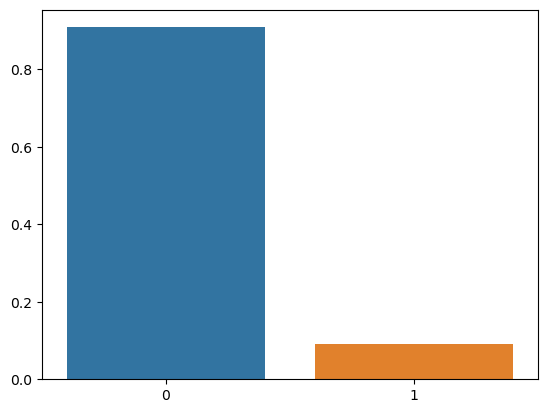

In [18]:
dx=df.query('saw_homepage==1')['ordered']
import seaborn as sns
sns.barplot(x=dx.value_counts(normalize=True).index, y=dx.value_counts(normalize=True).values)


- 홈페이지를 방문한 사람들중 구매안한사람 90프로 10프로

------------

- 홈페이지를 방문한사람들중 로그인한사람 23234 안한사람 108843

---
- 목표: ordered =>주문량을 늘리는것 or saw_homepage => 구매홈페이지

- case를 나눌수있는부분
    - 데이터셋을 나눠서 1주일전 로그 , 지금 로그 로 참작
